In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data = x_train.copy()

# reshape
data = data.reshape(data.shape[0], -1)

# Convert the images into 3 channels
data = np.dstack([data] * 3)

# Resize the images 48*48
data = data.reshape(-1, 28, 28, 3)
data = np.asarray([image.img_to_array(image.array_to_img(im, scale=False).resize((48, 48))) for im in data])

# Load pretrained model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

# compute features
data_features = tf.keras.applications.vgg16.preprocess_input(data)
data_features = model.predict(data_features)

# Prepare for computing correlation
data_features  = data_features.reshape(data_features.shape[0], -1)
query_features = np.array([data_features[y_train == i][0] for i in range(10)])

In [ ]:
def func(query):
    # compute correlation
    query_ = np.broadcast_to(query, data_features.shape)
    corr_list = list(map(pearsonr, query_, data_features))

    # sort correlation list
    tps = zip(corr_list, range(data_features.shape[0]))
    tps_sorted = sorted(tps, key = lambda item: item[0], reverse=True)

    # show pictures
    fig = plt.figure(figsize=(12,12))
    columns = 3
    rows = 3

    for i in range(1, columns*rows +1):
        index = tps_sorted[i-1][1]

        img = x_train[index]
        fig.add_subplot(rows, columns, i)
        
        plt.axis('off')
        plt.imshow(img)

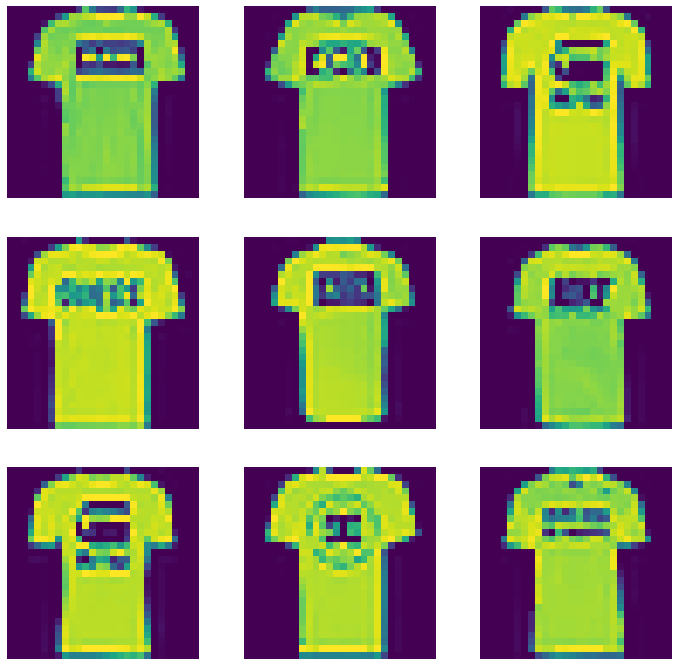

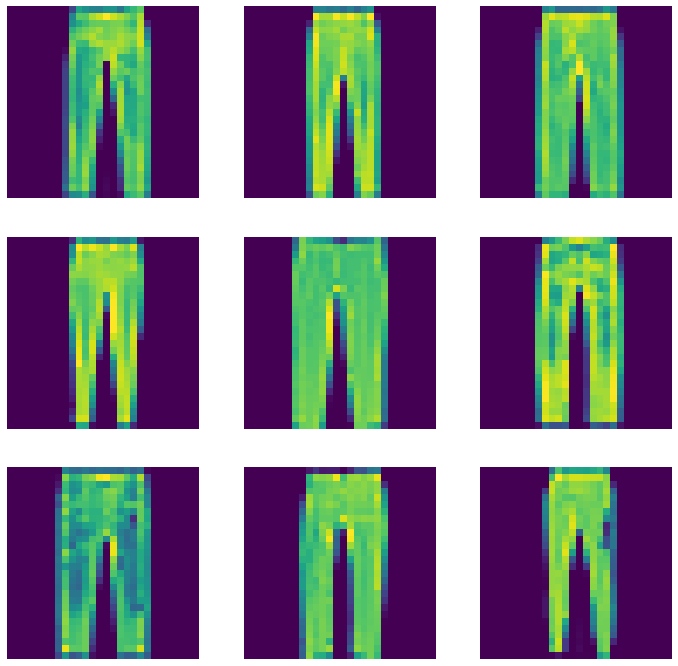

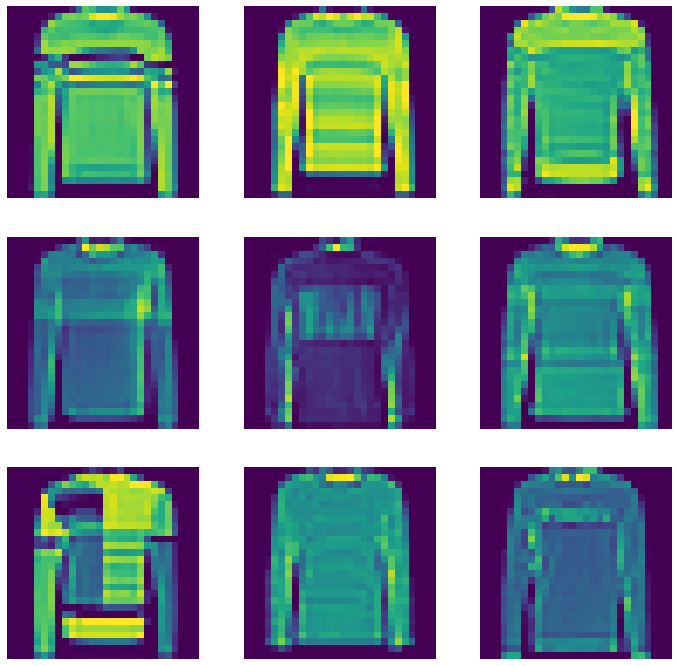

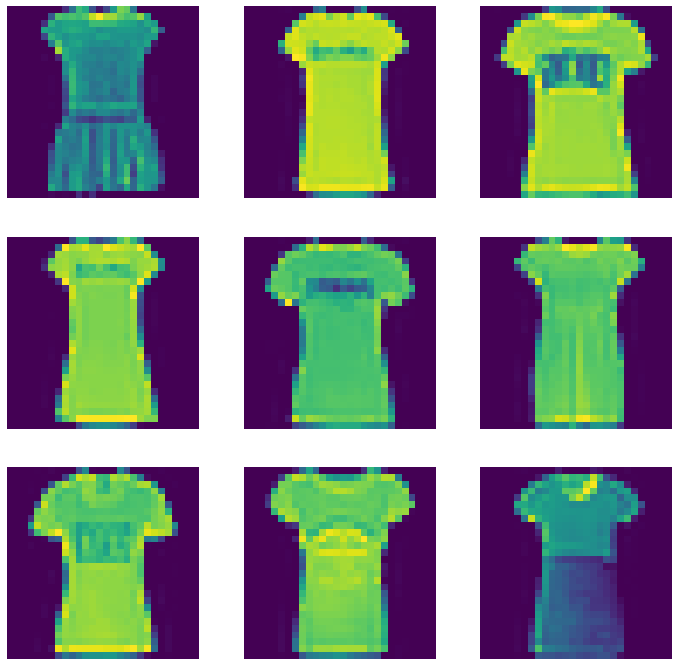

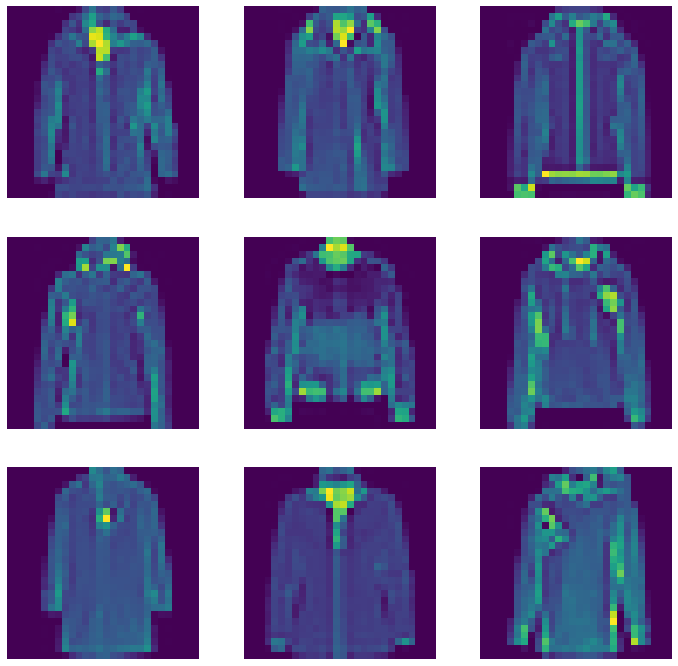

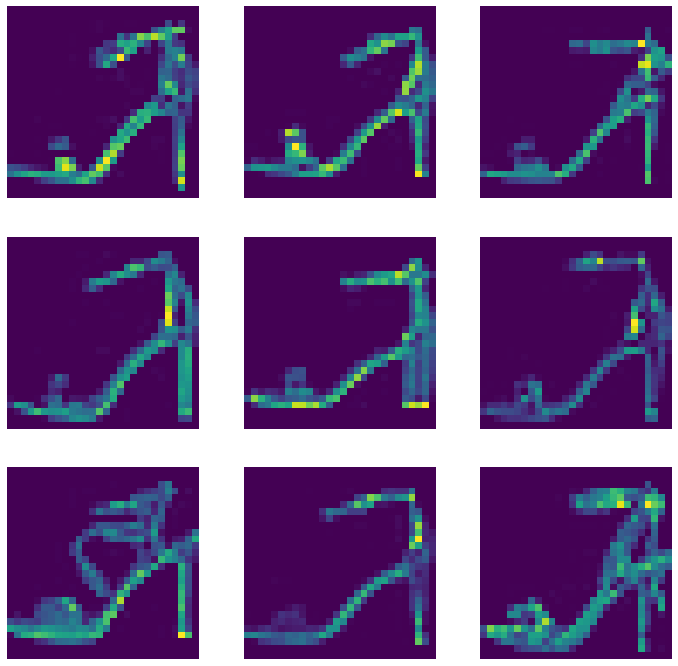

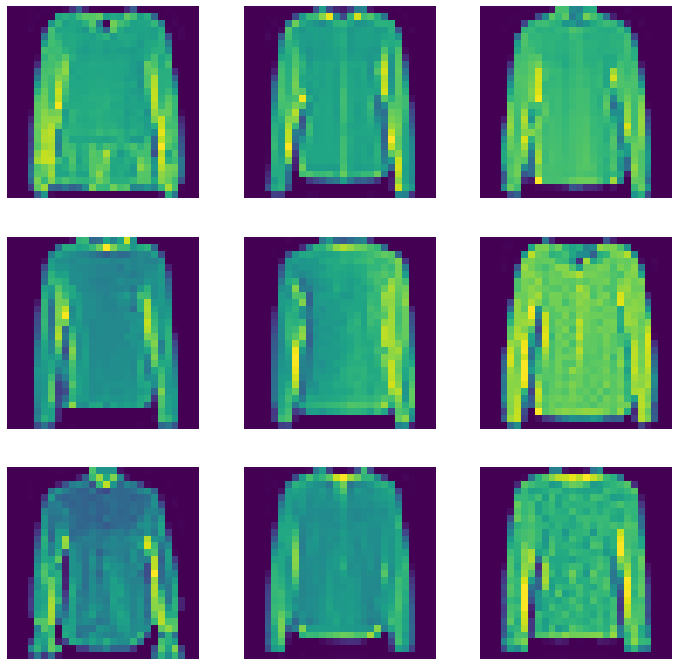

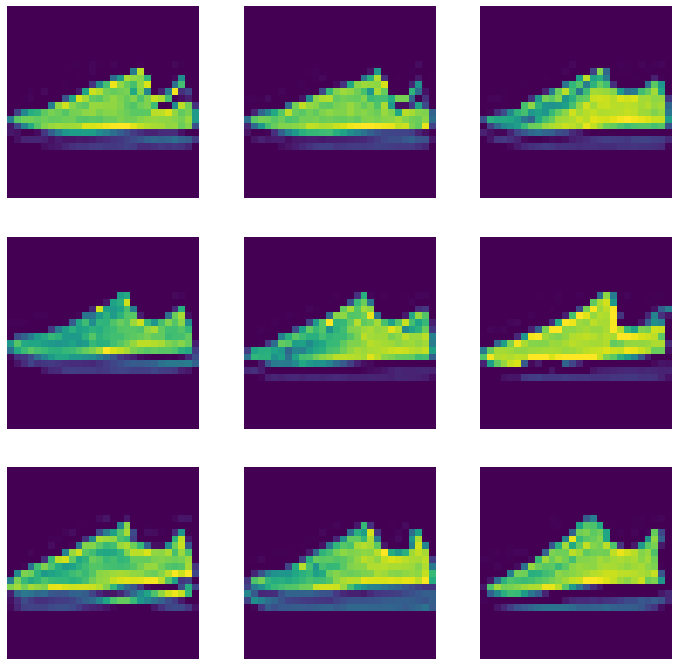

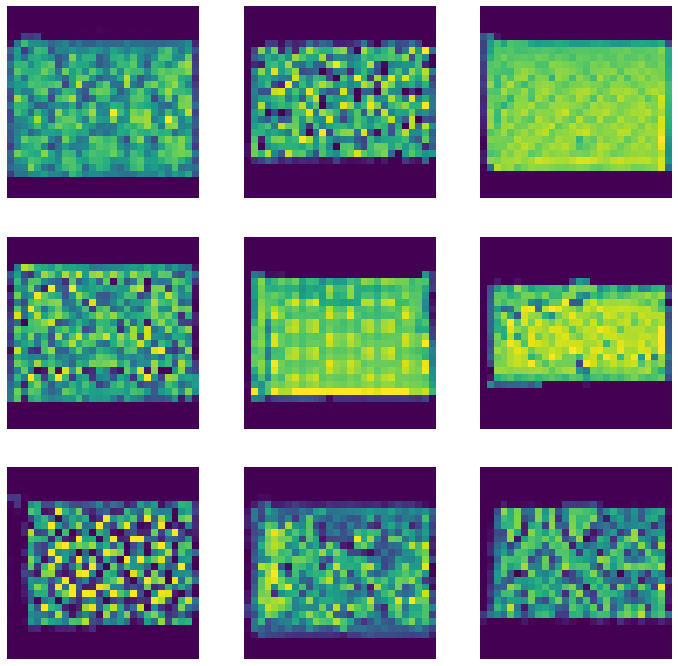

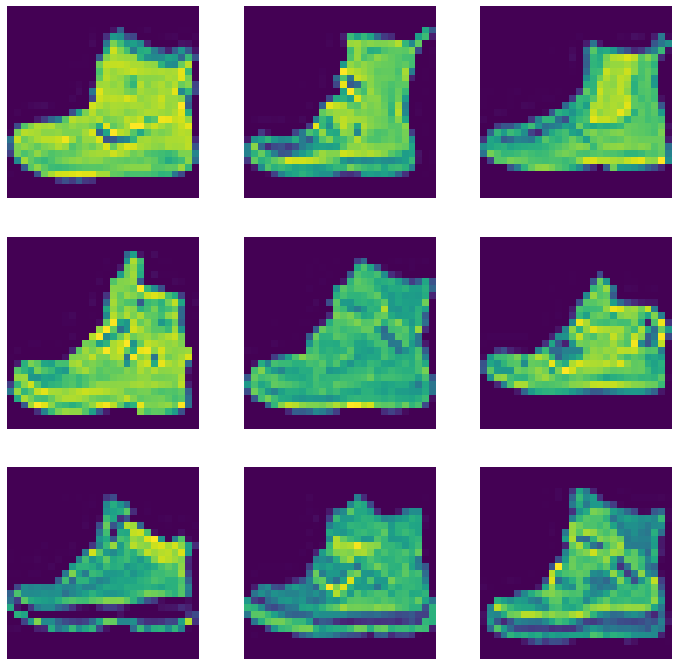

In [ ]:
for query in query_features:
    func(query)